# Predicting Subscription to a Video Game Newsletter Based on Age and Time Played on the Game

### By: Lila, Lauren, and Khush

## Introduction

Researchers have been collecting data on how gamers play video games. They have done this by collecting data through a server created by the data scientists on the game 'Minecraft'. This data can be used to explore a number of different questions.

The question we aim to answer through this report is *'Can age and time played of a player predict subscription to a newsletter in players.csv?'*

The dataset titled "players.csv" will be used to answer this question. It contains Information about each player observed. The information included is: 
 - The players experience (Beginner, Amateur, Veteran, Pro)
 - Whether or not the player has suscribed to a game-related newsletter
 - The hashed email of the player
 - The hours they have spent playing
 - The name of the player
 - The gender of the player
 - The age of the player

For this report we will be focusing on just the age of the player, the time that they have spent playing, and whether or not they have suscribed to a game-related newsletter.

## Methods & Results

This section is for loading, wrangling, performing a summary and creating visualizations of the data:

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [3]:
# loading the data
players_original <- read_csv("players.csv")

# renaming the subscribe column variables
players <- mutate(players_original, subscribe = as_factor(subscribe)) |>
    mutate(subscribe = fct_recode(subscribe, "Yes" = "TRUE", "No" = "FALSE"))
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,Yes,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,Yes,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,No,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,Yes,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,Yes,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,Yes,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [4]:
# Totalling the number of players based on subscription
subscriber_counts <- players |>
    group_by(subscribe) |>
    summarize(count=n())
subscriber_counts

subscribe,count
<fct>,<int>
No,52
Yes,144


In [5]:
# Minimum, maximum and mean number of player's age and number of hours played

# Age
age_summary <- players |>
    summarize(age_min = min(Age, na.rm=TRUE),
             age_max = max(Age, na.rm=TRUE),
             age_mean = mean(Age, na.rm=TRUE))
age_summary

# Hours played
played_hours_summary <- players |>
    summarize(played_hours_min = min(played_hours, na.rm=TRUE),
             played_hours_max = max(played_hours, na.rm=TRUE),
             played_hours_mean = mean(played_hours, na.rm=TRUE))
played_hours_summary

age_min,age_max,age_mean
<dbl>,<dbl>,<dbl>
9,58,21.13918


played_hours_min,played_hours_max,played_hours_mean
<dbl>,<dbl>,<dbl>
0,223.1,5.845918


Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


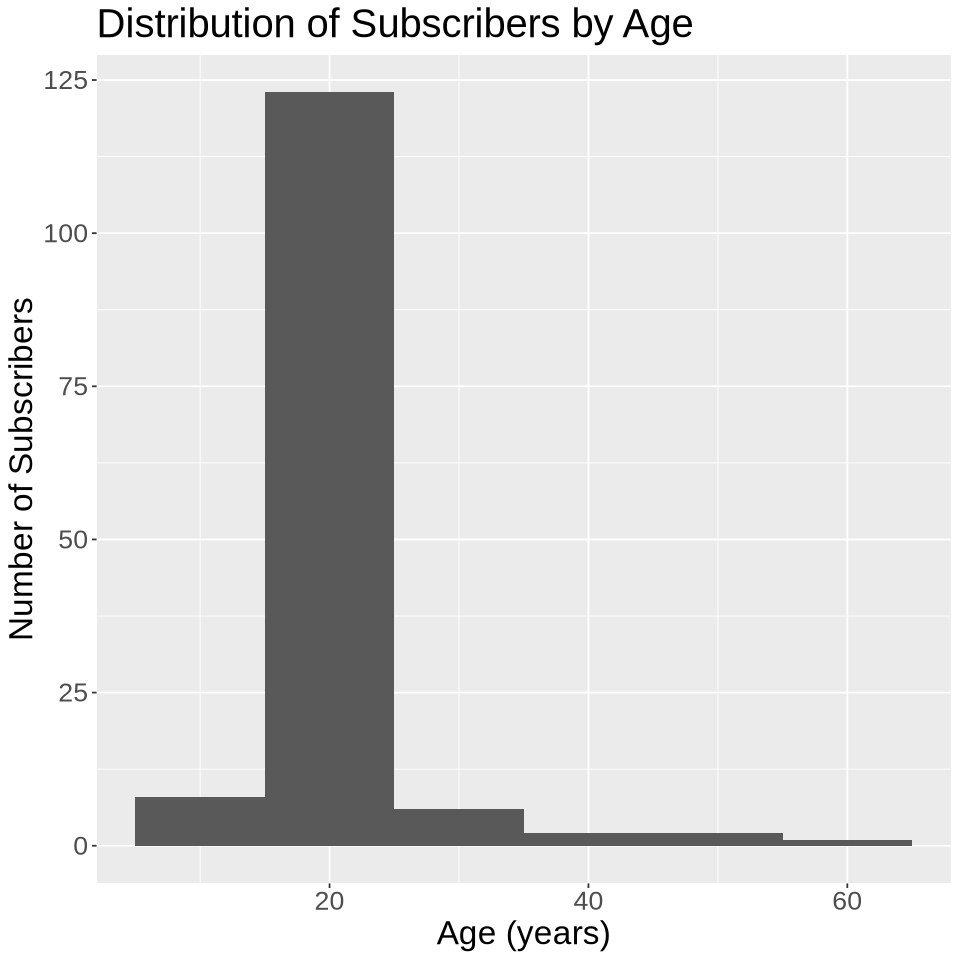

In [6]:
# Histogram of ages of subscribed individuals

options(repr.plot.width=8, repr.plot.height=8)
age_subscribers <- players |>
    filter(subscribe == "Yes") |>
    ggplot(aes(x=Age)) +
    geom_histogram(binwidth = 10) +
    labs(x="Age (years)", y="Number of Subscribers", title="Distribution of Subscribers by Age") +
    theme(text=element_text(size=20))
age_subscribers

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


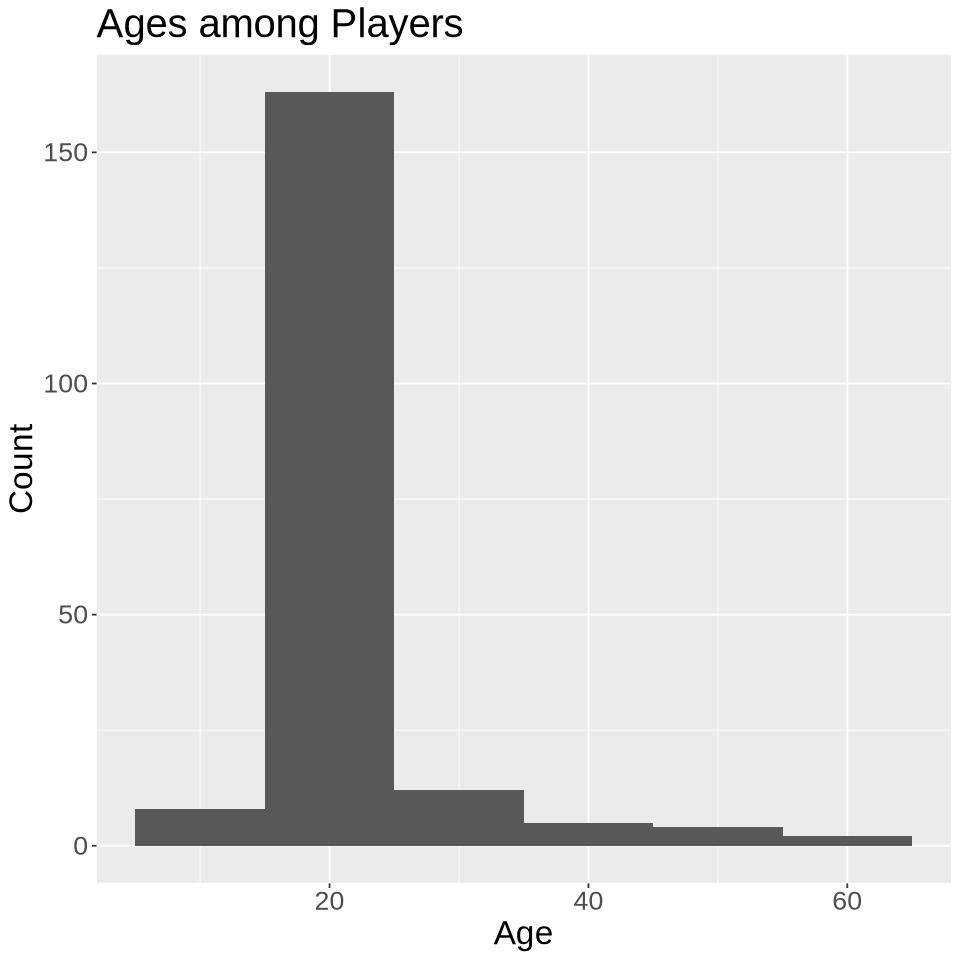

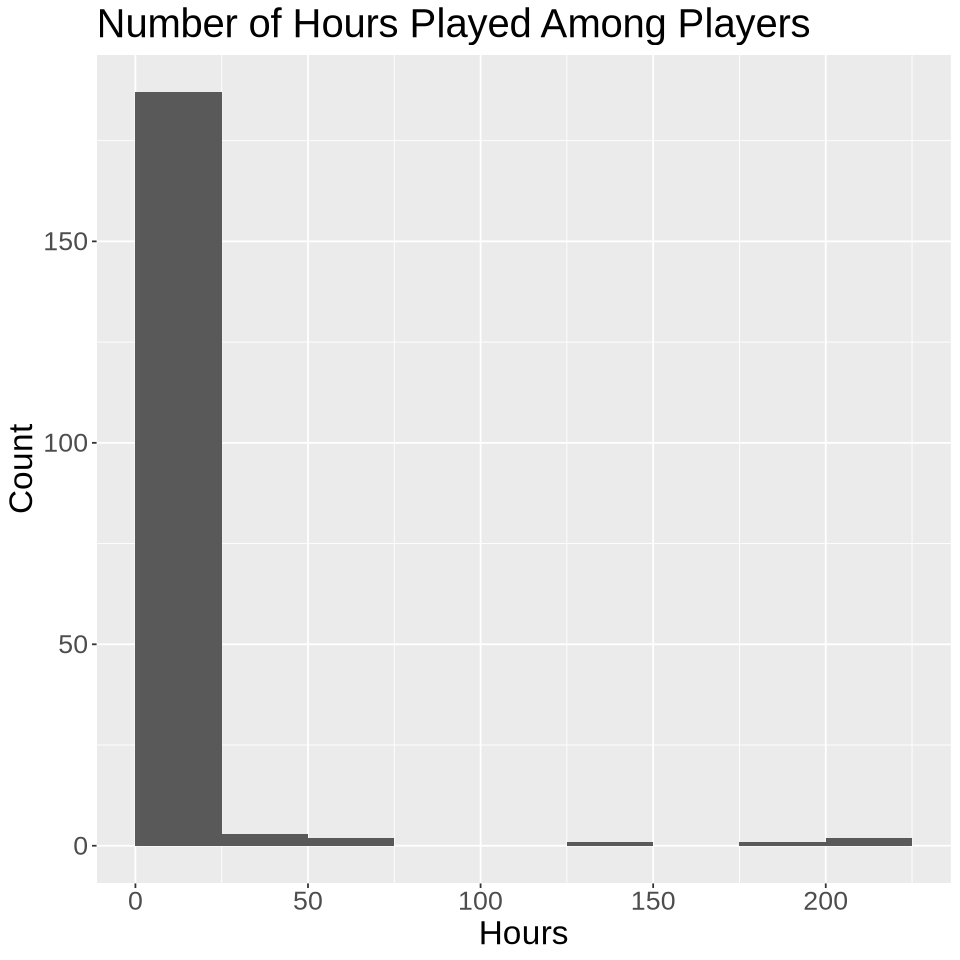

In [7]:
# Histogram for distributions of ages and hours played among players

options(repr.plot.width = 8, repr.plot.height = 8)

# Age
age_counts <- ggplot(players, aes(x=Age)) +
    geom_histogram(binwidth=10) +
    labs(x="Age", y="Count", title="Ages among Players") +
    theme(text=element_text(size=20))
age_counts

# Hours played
played_hours_counts <- ggplot(players, aes(x=played_hours)) +
    geom_histogram(boundary = 0, binwidth=25) +
    labs(x="Hours", y="Count", title="Number of Hours Played Among Players") +
    theme(text=element_text(size=20))
played_hours_counts

In [10]:
#creating the split
players_split <- initial_split(players, prop = 0.75, strata = subscribe)  
players_train<- training(players_split)   
players_test<- testing(players_split)

head(players_train)
head(players_test)

#creating the recipe
players_recipe <- recipe(subscribe ~ Age + played_hours , data = players_train) |>
   step_scale(all_predictors()) |>
   step_center(all_predictors())

#creating model and fit
knn_tune<- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
      set_engine("kknn") |>
      set_mode("classification")

#do cross validation
players_vfold <- vfold_cv(players_train, v = 10, strata = subscribe)

k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))
knn_results <- workflow() |>
      add_recipe(players_recipe) |>
      add_model(knn_tune) |>
      tune_grid(resamples = players_vfold, grid = k_vals) |>
      collect_metrics()
head(knn_results)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Veteran,No,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,No,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,No,2313a06afe47eacc28ff55adf6f072e7d12b0d12d7cbae29656f9029ec72bb53,0.0,Quinlan,Male,22
Amateur,No,200db0417ee70863c7e2a0f214c737476fb86de5869d0b907a077d726357e687,0.1,Anastasia,Female,17
Veteran,No,f8acd26a5e452b682b9f8b20108caef1ee2e745efe08e95806980bd2388a3fea,0.0,Finn,Male,23
Veteran,No,951e54f7376e2b2f0915e9e3646c701af4a2fe839385b13f9e0084b08f8070bd,0.1,Vivienne,Male,18


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,Yes,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Amateur,Yes,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47
Veteran,Yes,bbe2d83de678f519c4b3daa7265e683b4fe2d814077f9094afd11d8f217039ec,0.0,Nyla,Female,22
Veteran,Yes,7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,1.6,Lane,Female,23
Pro,Yes,4caa42e1b20511552434978171dcf7283fb6eb857eb871327e39bfc328002309,0.0,Daniela,Male,17
Regular,Yes,20ae3f8b5323674fe6e537bc91928841cfc2a00c1b36522fd25370bb6fa89d36,0.6,Ryker,Male,19


→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 12 rows.
               ✖ Assigned data has 13 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 13 to size 12.

There were issues with some computations   A: x1

There were issues with some computations   A: x1





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4629630,9,0.03619411,Preprocessor1_Model01
1,roc_auc,binary,0.5002525,9,0.05070022,Preprocessor1_Model01
2,accuracy,binary,0.4777778,9,0.03424674,Preprocessor1_Model02
2,roc_auc,binary,0.5145202,9,0.03700594,Preprocessor1_Model02
3,accuracy,binary,0.5068783,9,0.03772231,Preprocessor1_Model03
3,roc_auc,binary,0.4815657,9,0.03442272,Preprocessor1_Model03


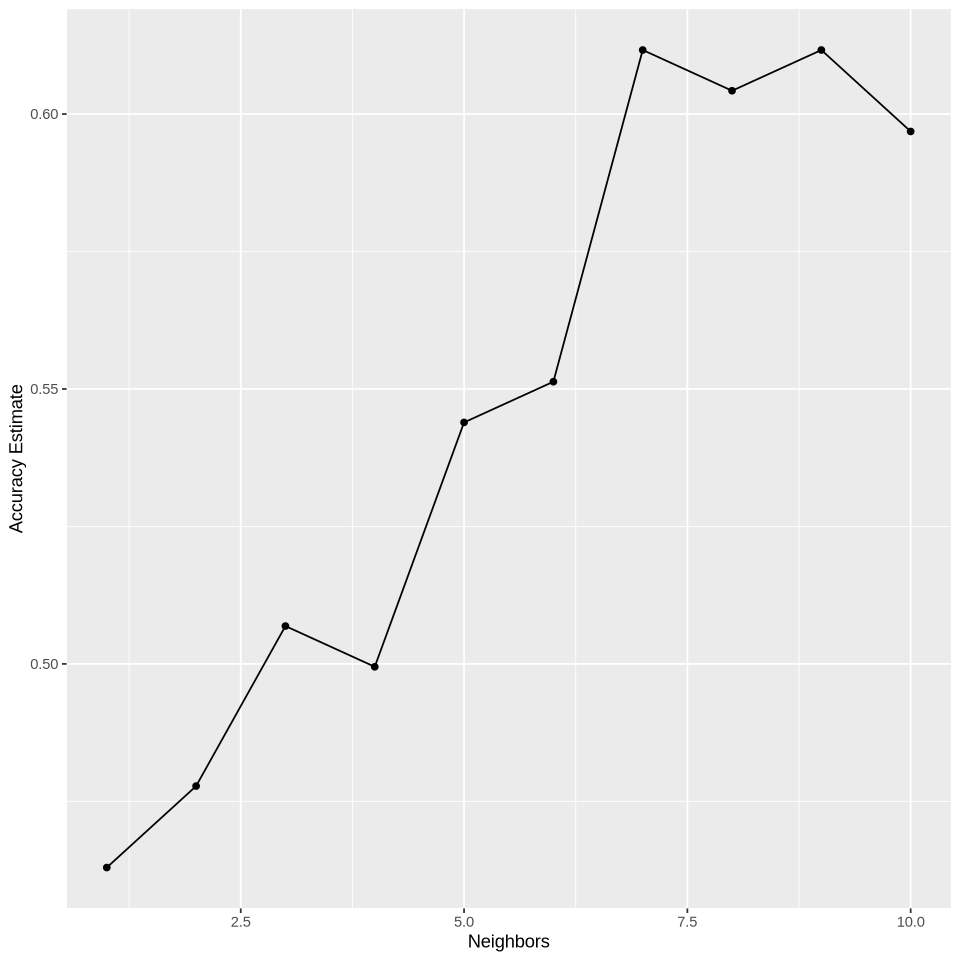

In [11]:
#get accuracies
accuracies <- knn_results |> 
      filter(.metric== "accuracy")

#plot accuracies vs k to find best k
accuracy_versus_k<- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") 
accuracy_versus_k